In [148]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Overlapping Generation Model (OLG)

## Model setup

In this setup the economy is populated by agents that live for 2 periods agents i.e. $t = 1,2$. $L_t$ individuals are born in period t and  the population is assumed to grow at rate n:

$$ L_t = L_{t-1}(1+n) $$

We assume agents derive utility from consumption while alive and log-preferences:

$$ U_t = u(c_{1t}) + \frac{1}{1+\rho} u(c_{2t+1}) $$

where 
* $c_{1t}$ denotes consumption when the agent is young at time t
* $c_{2t+1}$ denotes consumption when the agent is old at time t+1
* $\rho$ is the discount rate
* $u(x) = \log{x}$

While young, agents supply 1 unit of labor inelastically at wage rate $w_t$ which is split into consumption $c_{1t}$ and savings $s_t$. When old they consume their gross savings where. The interest rate earned from $t$ to $t+1$ is given by $r_{t+1}$. Thus, agents face the following budget constraints:

$$ c_{1t} + s_t = w_t $$
$$ c_{2t+1} = (1+r_{t+1}) s_t $$

It follows that the lifetime budget constraint is given by:

$$ c_{1t} + \frac{c_{2t+1}}{1+r_{t+1}} = w_t $$

The firms of the economy is assumed to be characterized by Cobb-Douglas production technology where the inputs are used are capital $K$ and labor $L$ to obtain output $Y$:

$$ f(K,L) = Y = K^\alpha L^{1-\alpha},      \alpha \in (0,1) $$

## Analytical solution

### Households' problem

First, define lifetime utility:

In [149]:
#Initialize variabels in Sympy
c1 = sm.symbols('c_1t')
c2 = sm.symbols('c_2t+1')
rho = sm.symbols('rho')

#Setup utility
uc1 = sm.ln(c1)
uc2 = sm.ln(c2)
U = uc1 + 1/(1+rho) * uc2
display(U)

log(c_1t) + log(c_2t+1)/(rho + 1)

Next, setup the budget constraint (BC):

In [150]:
#Initialize variabels in Sympy
wt = sm.symbols('w_t')
rt1 = sm.symbols('r_t+1')

#Setup BC
bc = c1 + c2 / (1+rt1) - wt
display(bc)

c_1t + c_2t+1/(r_t+1 + 1) - w_t

Now, setup the Langrangian

In [151]:
#Initialize variabels in Sympy
lamb = sm.symbols('lambda')

#Setup Lagrangian
L = U + lamb * (-1)*bc
display(L)

-lambda*(c_1t + c_2t+1/(r_t+1 + 1) - w_t) + log(c_1t) + log(c_2t+1)/(rho + 1)

Setup first order conditions (FOC)

In [152]:
foc1 = sm.Eq(0,sm.diff(L,c1))
foc2 = sm.Eq(0,sm.diff(L,c2))
display(foc1)
display(foc2)

Eq(0, -lambda + 1/c_1t)

Eq(0, -lambda/(r_t+1 + 1) + 1/(c_2t+1*(rho + 1)))

Solve for the lagrangian multiplier lambda

In [153]:
lam1 = sm.solve(foc1,lamb)[0]
lam2 = sm.solve(foc2,lamb)[0]
display(lam1)
display(lam2)

1/c_1t

(r_t+1 + 1)/(c_2t+1*(rho + 1))

Thus, the Euler-equation is given by:

In [154]:
euler1 = sm.solve(sm.Eq(lam1,lam2),c1)[0] #Equate lambdas and solve
euler2 = sm.Eq(euler1, c1)
display(euler2)

Eq(c_2t+1*(rho + 1)/(r_t+1 + 1), c_1t)

Replacing per period BC in the Euler and solving for $s_t$ will characterize individual
savings behavior

In [155]:
#Initialize variabels in Sympy
st = sm.symbols('s_t')

#Setup per period BC
bc1 = wt-st
bc2 = (1+rt1)*st

#Replace
euler3 = euler2.subs(c1,bc1)
euler4 = euler3.subs(c2,bc2)
display(euler4)

Eq(s_t*(rho + 1), -s_t + w_t)

Solve for optimal savingsbehaviour:

In [156]:
saving = sm.solve(euler4,st)[0] #Solve
opt_saving = sm.Eq(saving, st) #equate with s_t
display(opt_saving)

Eq(w_t/(rho + 2), s_t)

### Firms' problem

Firms take prices as given and hence, maximize profit $\Pi$ given by cf. theory section:
$$ \Pi = K^\alpha_t L^{1-\alpha}_t - r_t K_t - w_t L_t $$
First, setup the production function:

In [157]:
#Initialize variabels in Sympy
alpha = sm.symbols('alpha')
K = sm.symbols('K_t')
L = sm.symbols('L_t')
rt = sm.symbols('r_t')
wt = sm.symbols('w_t')
Y = sm.symbols('Y')

#Setup production function
Y = K**alpha * L**(1-alpha)
display(Y)

K_t**alpha*L_t**(1 - alpha)

Next, we derive the interest and wage rate

In [158]:
#Derivatives
dyk = sm.diff(Y,K)
dyl = sm.diff(Y,L)

#Equate
interest = sm.Eq(rt,dyk) 
wage = sm.Eq(wt,dyl)
display(interest)
display(wage)

Eq(r_t, K_t**alpha*L_t**(1 - alpha)*alpha/K_t)

Eq(w_t, K_t**alpha*L_t**(1 - alpha)*(1 - alpha)/L_t)

Rewrite to pr. worker

In [159]:
#Initialize variabels in Sympy
k = sm.symbols('k_t')

#Rewrite
intrate = sm.Eq(rt,(alpha*k**(alpha-1)))
wagerate = sm.Eq(wt, ((1-alpha)*k**(alpha)))
display(intrate)
display(wagerate)

Eq(r_t, alpha*k_t**(alpha - 1))

Eq(w_t, k_t**alpha*(1 - alpha))

### Law-of-motion and steady state capital

The aggregate capital stock in $t+1$ is given by
$$k_{t+1}(1+n) = s_t$$

Recall the savingsbehaviour:

In [160]:
display(opt_saving)

Eq(w_t/(rho + 2), s_t)

Substitute for the wage rate and use aggregate capital stock to obtain the law-of-motion:

In [161]:
#Initialize variabels in Sympy
k1 = sm.symbols('k_t+1')
n = sm.symbols('n')

#Replace in savings
savings = opt_saving.subs(wt, ((1-alpha)*k**(alpha)))

#Use definition of aggregate capital
cap = k1 * (1+n)
agcap = savings.subs(st,cap)

#Solve for k_t+1 to obtain law of-motion
lom = sm.solve(agcap,k1)[0]
lom = sm.Eq(k1,lom) #Equate
display(lom)

Eq(k_t+1, k_t**alpha*(1 - alpha)/(n*rho + 2*n + rho + 2))

Use that in steady state (SS) $k_t = k_{t+1} = k^*$:

In [162]:
#Initialize variabels in Sympy
kstar = sm.symbols('k^*')

#Replace with k*
lom1 = lom.subs(k1, kstar)
lom2 = lom1.subs(k, kstar)

#Solve for k*
lom3 = sm.solve(lom2, kstar)[0]
display(lom3)

((-n*rho - 2*n - rho - 2)/(alpha - 1))**(1/(alpha - 1))

We can compute the SS value by turning the ss-function into a python function:

In [163]:
ss_func = sm.lambdify((n, rho, alpha),lom3) #turn into python function
ss_capital = ss_func(0.2,0.5,0.1) #give the funtion random values
print(f'The SS level of capital for n=0.2, rho=0.5 and alpha=0.1 is {ss_capital}')

The SS level of capital for n=0.2, rho=0.5 and alpha=0.1 is 0.2624361248771799


## Numerical solution

We can also solve for the SS numerically:

In [164]:
#Set parameter values
alpha = 1/3
n = 0.2
rho = 0.5

#Define objective function i.e. the low of motion as seen above
f = lambda k: k**alpha #input for the objective function
obj_kss = lambda kss: kss - (f(kss)*(1-alpha))/(n*rho+2*n+rho+2) #the objective functiin is the law of motion

#Optimize using the bisect method
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='bisect')

print('The SS level of capital for n=0.2, rho=0.5 and alpha=0.1 is',result.root)    

The SS level of capital for n=0.2, rho=0.5 and alpha=0.1 is 0.10475656017450916


## Graphical representation of dynamics

From the analytical section recall:

In [165]:
display(wagerate)
display(opt_saving)
display(cap)

Eq(w_t, k_t**alpha*(1 - alpha))

Eq(w_t/(rho + 2), s_t)

k_t+1*(n + 1)

This we use to construct the transition equation

In [166]:
def transition(k,alpha,rho,n):
    w = k**alpha * (1-alpha)
    s = w / (rho+2)
    k1 = s / (n+1)
    return k1

Use the transition function to create all values of capital

In [167]:
def transition_curve(alpha,rho,n):
    
    #grids
    k_1 = np.linspace(1e-20,6,1000)
    k_2 = np.empty(1000)
    
    #construct array of "tomorrows" capital
    for i,k in enumerate(k_1):
        k_plus = transition(k,alpha,rho,n)
        k_2[i] = k_plus
        
    return k_1, k_2

Next we plot the transition diagram:

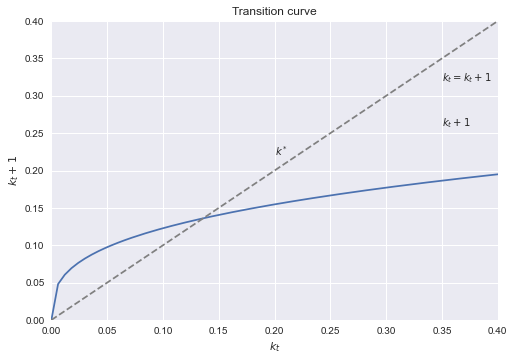

In [183]:
def fig(rho):
    k_1, k_2 = transition_curve(alpha,rho,n)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_1,k_2)
    ax.plot(k_1,k_1, '--', color='grey')
    plt.text(0.35,0.26,'$k_t+1$')
    plt.text(0.35,0.32,'$k_t=k_t+1$')
    plt.text(0.2,0.22,'$k^*$')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_t+1$')
    ax.set_title('Transition curve')
    ax.set_xlim([0,0.4])
    ax.set_ylim([0,0.4]);
    return

import ipywidgets as widgets
widgets.interact(fig, 
    rho = widgets.FloatSlider(description='rho', min=0, max=16, step=0.01, value=0.1),
);

As seen on the figure the ss capital decreases as rho --> $\infty$.
$\rho$ is a measurement of time preference (impatience). The higher
$\rho$ is the more impatient are the agents. Hence, they will
spend more in when young --> lower savings --> lower ss capital.

# Model extension

We now impose a pay-as-you-go social security system in the model. The government raises taxes, $\tau$, from the young population in period t and transfers them to the old. Budget constraints is thus:

$$ c_{1t} + s_t + \tau w_t = w_t $$

$$ c_{2t+1} = (1+r_{t+1}) s_t + \tau w_t $$

In [170]:
tau = sm.symbols('tau')
c1 = sm.symbols('c_1t')
c2 = sm.symbols('c_2t+1')
rho = sm.symbols('rho')
alpha = sm.symbols('alpha')
K = sm.symbols('K_t')
L = sm.symbols('L_t')
rt = sm.symbols('r_t')
wt = sm.symbols('w_t')
Y = sm.symbols('Y')
lamb = sm.symbols('lambda')
st = sm.symbols('s_t')
kstar = sm.symbols('k^*')
k1 = sm.symbols('k_t+1')
n = sm.symbols('n')
k = sm.symbols('k_t')


#lifetime budget constraint
life_con = c1+c2/(1+rt1)-tau/(1+rt1)*wt-(1-tau)*wt


In [171]:
#setting up the new lagrangian
L1 = U + lamb * (-1)*life_con
L1

-lambda*(c_1t + c_2t+1/(r_t+1 + 1) - tau*w_t/(r_t+1 + 1) - w_t*(1 - tau)) + log(c_1t) + log(c_2t+1)/(rho + 1)

In [172]:
#F.O.C's
foc3 = sm.Eq(0,sm.diff(L1,c1))
foc4 = sm.Eq(0,sm.diff(L1,c2))
display(foc3)
display(foc4)

Eq(0, -lambda + 1/c_1t)

Eq(0, -lambda/(r_t+1 + 1) + 1/(c_2t+1*(rho + 1)))

In [173]:
#solving F.O.C's
lam1 = sm.solve(foc3,lamb)[0]
lam2 = sm.solve(foc4,lamb)[0]
display(lam1)
display(lam2)

1/c_1t

(r_t+1 + 1)/(c_2t+1*(rho + 1))

In [174]:
#Equate lambdas and solve for Euler eq.
euler1 = sm.solve(sm.Eq(lam1,lam2),c1)[0] 
euler2 = sm.Eq(euler1, c1)
display(euler2)

Eq(c_2t+1*(rho + 1)/(r_t+1 + 1), c_1t)

In [175]:
# substituting per period budgetconstraint
sav = euler2.subs(c2,((1+rt1)*st+tau*wt))
sav2 = sav.subs(c1,(wt-st-tau*wt))

# solving for savings
opt_sav = sm.solve(sav2,st)[0]
opt_sav

w_t*(-r_t+1*tau + r_t+1 - rho*tau - 2*tau + 1)/(r_t+1*rho + 2*r_t+1 + rho + 2)

In [176]:
sav1 = opt_sav.subs(rt1,(alpha*k**(alpha-1)))
sav2 = sav1.subs(wt,(1-alpha)*k**(alpha))
sav_func = sm.lambdify((k,alpha,tau,rho),sav2)

Next we define a new transition function for the new savings function:

In [177]:
def transition_payg(k,alpha,rho,tau,n):
    w = k**alpha * (1-alpha)
    s = sav_func(k,alpha,tau,rho)
    k1 = s / (n+1)
    return k1

In [178]:
def transition_curve_payg(alpha,rho,n,tau,rt):
    
    #grids
    k_1_payg = np.linspace(1e-20,6,1000)
    k_2_payg = np.empty(1000)
    
    #construct array of "tomorrows" capital
    for i,k in enumerate(k_1):
        k_plus = transition_payg(k,alpha,rho,tau,n)
        k_2_payg[i] = k_plus
        
    return k_1_payg, k_2_payg

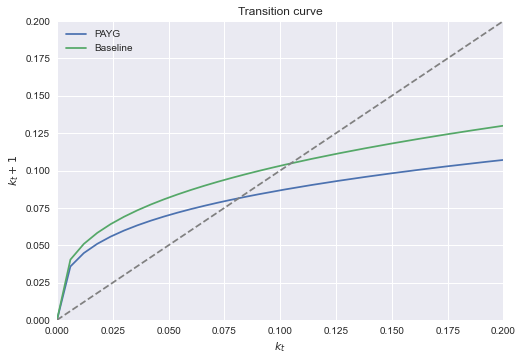

In [179]:
#initializing parameters again
tau = 0.3
alpha = 1/3
rho = 0.5
n = 0.2

def fig_payg(tau):
    k_1_payg, k_2_payg = transition_curve_payg(alpha,rho,n,tau,rt)
    k_1, k_2 = transition_curve(alpha,rho,n)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_1_payg,k_2_payg,label="PAYG")
    ax.plot(k_1,k_2,label="Baseline")
    ax.plot(k_1_payg,k_1_payg, '--', color='grey')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_t+1$')
    ax.set_title('Transition curve')
    ax.set_xlim([0,0.2])
    ax.set_ylim([0,0.2]);
    ax.legend()
    return

import ipywidgets as widgets
widgets.interact(fig_payg, 
    tau = widgets.FloatSlider(description='tau', min=0, max=1, step=0.01, value=0.1),
);

We see that when the tax rate increases the steady state capital decreases. This decrease in steady state capital happens through two channels:
1) When the tax rate increases the young have a lower disposable income and need to save less to obtain same level of consumption in period 1.
2) When the tax rate increases the old receive higher level of social benefit. This means that they can (and will) save less when young, and still obtain the same level of consumption in period 2.

# numerical optimization

We want to optimize capital and solve for $w^*$, $s^*$,$c_{1}^*$, $c_{2}^*$ and $u^*$:

In [180]:
def save_func(k):
    sav = (k**alpha*(1-alpha)*(-alpha*k**(alpha-1)*tau+alpha*k**(alpha-1)-rho*tau-2*tau+1)/(alpha*k**(alpha-1)*rho+2*alpha*k**(alpha-1)+rho+2)-k)
    return sav

def obj(k,alpha,tau,rho):
    return -save_func(k)

def optimizer(obj,k,alpha,tau,rho):
    res = optimize.minimize_scalar(obj,method="bounded",bounds=(0,1),args=(rho,alpha,tau))
    return res

In [185]:
nice = optimizer(obj,k,alpha,tau,rho)
kstar = nice.x
wstar = kstar**alpha * (1-alpha)
sstar = kstar/(1+n)
c1_star = wstar-sstar-tau*wstar
c2_star = (1+(alpha*kstar**(alpha-1)))*sstar+tau*wstar
u_star = c1_star + 1/(1+rho) * c2_star

In [186]:
print(f'Steady state capital is {kstar:.5f}')
print(f'wage in steady state is {wstar:.5f}')
print(f'Savings in steady state is {sstar:.5f}')
print(f'In steady state the young consume {c1_star:.5f}')
print(f'In steady state the old consume {c2_star:.5f}')
print(f'The utility is {u_star:.5f}')

Steady state capital is 0.01062
wage in steady state is 0.14653
Savings in steady state is 0.00885
In steady state the young consume 0.09372
In steady state the old consume 0.11386
The utility is 0.16963
